<a href="https://colab.research.google.com/github/gyeongseoMin/DataScience/blob/main/%EB%AF%BC%EA%B2%BD%EC%84%9C_20203060_%EA%B3%BC%EC%A0%9C7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

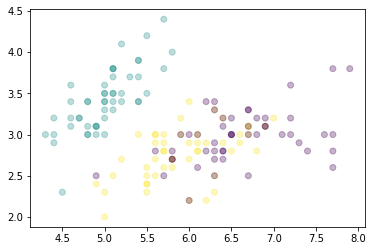

In [ ]:
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

data = []
with open('iris.data', 'r') as f:
#f = open('iris.data', 'r')
    for line in f:
        if line.strip():
            #strip() : 뒤에 공백 문자 삭제
            # items = line.strip()
            # print(items)
            item = line.strip().split(",")
            # print(item)
            data.append( ([float(val) for val in item[:-1]], item[-1]) )

species = {s: i for  i, s in enumerate(set(d[1] for d in data))}
data = [(d[0], species[d[1]]) for d in data]

plt.scatter([d[0][0] for d in data], 
            [d[0][1] for d in data], 
            c = [d[1] for d in data], alpha=0.3)
plt.show()

In [ ]:
import random

random.shuffle(data)
train = data[:-30]
test = data[-30:]
print(len(train), len(test))

120 30


In [ ]:
# eculidean distance
# a = (a1, a2, a3, a4)
# b = (b1, b2, b3, b4)
# sqrt((b1-a1)^2 + (b2-a2)^2 + (b3-a3)^2 + (b4-a4)^2)

def distance(a, b):
    s = 0
    for i in range(len(a[0])):
        s += (a[0][i] - b[0][i]) ** 2
    return s** 0.5
    # return sum((bi-ai) ** 2 for ai, bi in zip(a, b)) ** 0.5

In [ ]:
def knn_classify(k, query, train):
    knns = sorted((distance(point, query), point) for point in train)[:k]

    # 거리에 따라 가중치를 주어 점수를 계산
    scores = {}
    for dist, point in knns:
        scores[point[1]] = scores.get(point[1], 0) + 1/(1+dist)

    resp, score = max(scores.items(), key=lambda x: x[1])

    return resp

In [ ]:
k = 3

correct = sum(1 for t in test if knn_classify(k, t, train) == t[1])
accurary = correct/len(test)  # 맞은 문제 수 / 전체 문제 수
print('acurray: ', accurary)

acurray:  0.9666666666666667


100%|██████████| 100/100 [00:15<00:00,  6.33it/s]


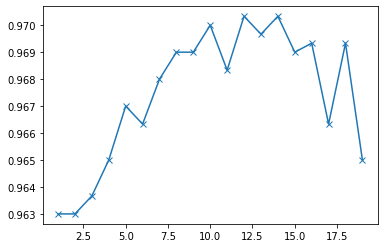

In [ ]:
num_trails = 100
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size

corrects = [0] * 20
for i in tqdm(range(num_trails)): # tqdm 로딩화면 띄우기
    random.shuffle(data)
    train = data[:train_size]
    test = data[train_size:]

    for k in range(1, 20):
        corrects[k] += sum(1 for t in test if knn_classify(k, t, train) == t[1])
for k in range(1, 20):
    corrects[k] /= num_trails * test_size
plt.plot(range(1, 20), corrects[1:], '-x')
plt.show()